In [32]:
# import pandas and numpy, then use pandas read the csv file. 
    
import pandas as pd
import numpy as np

DF1 = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

DF1

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [33]:
# check the missing value, and use the sum() to calculate how many missing value are there.
# since the there is no missing value, then we do not change anything 

DF1.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

In [34]:
# encoding the attributes. 


from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe 
encodedDF1 = pd.DataFrame()

# Encode categoric or boolean attributes
for i in range(0, DF1.shape[1]):
    if DF1.dtypes[i]=='object' or DF1.dtypes[i]=='bool':
        encodedDF1[DF1.columns[i]] = le.fit_transform(DF1[DF1.columns[i]])


# print them out, and use ==== to separate
print("-=========================")
print(DF1)
print("-=========================")
encodedDF1


# in this case, 0 means red, 1 means white
# 0 means high, whereas 1 means low

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


In [35]:
# create contengency table for type and alcohol

table1 = pd.crosstab(DF1.Type, DF1.Alcohol_flag, margins = True)


# print out the table 
table1

Alcohol_flag,High,Low,All
Type,,,
Red,485,600,1085
White,1176,1084,2260
All,1661,1684,3345


In [36]:
# create contengency table for type and sugar

table2 = pd.crosstab(DF1.Type, DF1.Sugar_flag, margins = True)


# print out the table 
table2

Sugar_flag,High,Low,All
Type,,,
Red,237,848,1085
White,1382,878,2260
All,1619,1726,3345


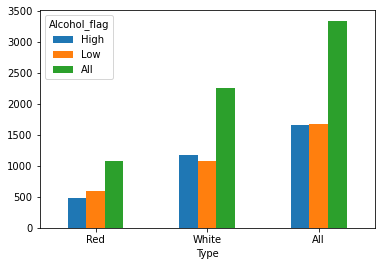

In [37]:
# Creating barplot for tyoe and acolhol

# x label rotation
barplot = table1.plot.bar(rot=0)

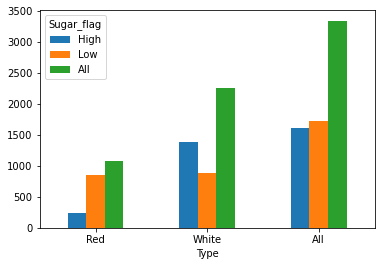

In [38]:
# Creating barplot for tyoe and sugar

# x label rotation
barplot = table2.plot.bar(rot=0)

In [42]:
# the probability of red 

pred = (table1.iloc[0,1] + table1.iloc[0,2]) / (table1.iloc[2,1] + table1.iloc[2,2])
                                                   
pred
              

0.33505667130642275

In [43]:
# the probability of white

pwhite = (table1.iloc[1,1] + table1.iloc[1,2]) / (table1.iloc[2,1] + table1.iloc[2,2])
                                                   
pwhite

0.6649433286935773

In [44]:
# the probability of alcohol high

alcoholHigh = (table1.iloc[2,1])/(table1.iloc[2,1] + table1.iloc[2,2])

alcoholHigh

0.33485782461722013

In [45]:
# the probability of alcohol low

alcoholLow = (table1.iloc[2,2])/(table1.iloc[2,1] + table1.iloc[2,2])

alcoholLow

0.6651421753827799

In [46]:
# the probability of sugar high

sugarHigh = (table2.iloc[2,1])/(table2.iloc[2,1] + table2.iloc[2,2])

sugarHigh

0.3403667915598501

In [47]:
# the probability of sugar low

sugarLow = (table2.iloc[2,2])/(table2.iloc[2,1] + table2.iloc[2,2])

sugarLow

0.6596332084401498

In [50]:
# the probability of alcohol high given type red
conHighGivenRed=(table1.iloc[0,1]+table1.iloc[0,2])/(table1.iloc[2,1]+table1.iloc[2,2]) * ((table1.iloc[2,1])/(table1.iloc[2,1]+table1.iloc[2,2]))

conHighGivenRed

0.11219634807715569

In [51]:
# calculate  probabilities Alcohol low Type = Red

conLowGivenRed=(table1.iloc[0,1]+table1.iloc[0,2])/(table1.iloc[2,1]+table1.iloc[2,2])*((table1.iloc[2,2])/(table1.iloc[2,1]+table1.iloc[2,2]))

conLowGivenRed

0.22286032322926708

In [52]:
# calculate  probabilities sugar high given Type Red

conSugarHighGiveRed= (table2.iloc[0,1]+table2.iloc[0,2])/(table2.iloc[2,1]+table2.iloc[2,2]) *((table2.iloc[2,1])/(table2.iloc[2,1]+table2.iloc[2,2]))

conSugarHighGiveRed

0.12974344470226587

In [53]:
# calculate l probabilities sugar low given Type Red

conSugarLowGivenRed= (table2.iloc[0,1]+table2.iloc[0,2])/(table2.iloc[2,1]+table2.iloc[2,2]) *((table2.iloc[2,2])/(table2.iloc[2,1]+table2.iloc[2,2]))

conSugarLowGivenRed

0.251443697873163

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output 
X = encodedDF1.iloc[:,0:2]
y = encodedDF1.iloc[:,2]

# use 'stratify' to have the same proportion of 0 and 1 classes in a dataset to train
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2, stratify=y)

# show the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag
1783     1             1
110      0             1
2936     1             0
2326     1             1
612      1             1
...    ...           ...
3074     1             0
2259     1             1
1524     0             0
1629     1             1
512      1             1

[2676 rows x 2 columns]
      Type  Alcohol_flag
1779     1             1
3176     1             0
2544     1             0
1470     0             0
810      1             0
...    ...           ...
1979     1             1
2923     1             0
1518     0             0
998      1             1
1342     0             0

[669 rows x 2 columns]


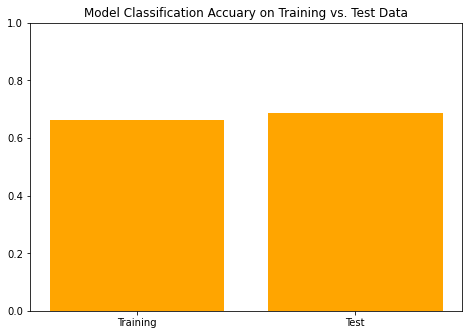

In [56]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [65]:


#Create a Gaussian Classifier
NBmodel = GaussianNB()



# Prepare input and output 
X = encodedDF1.iloc[:,0:2]
y = encodedDF1.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# show the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag
3303     1             0
1633     1             1
813      1             0
2700     1             0
2594     1             0
...    ...           ...
626      1             1
2259     1             1
3002     1             0
1033     0             1
512      1             1

[2508 rows x 2 columns]
      Type  Alcohol_flag
1065     0             1
1160     0             1
816      1             1
1468     0             0
876      1             0
...    ...           ...
1899     1             1
1886     1             1
2003     1             1
499      0             0
640      1             0

[837 rows x 2 columns]


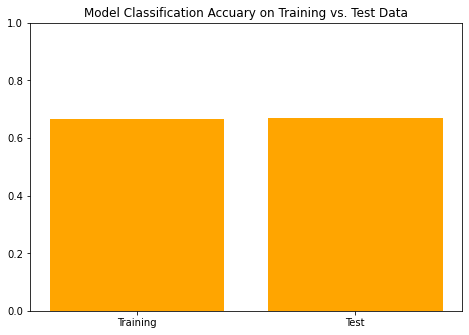

In [66]:


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy  training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot  accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [68]:


#Create a Gaussian Classifier
NBmodel = GaussianNB()



# Prepare input and output 
X = encodedDF1.iloc[:,0:2]
y = encodedDF1.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3, stratify=y)

# show the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag
833      1             1
1582     0             0
469      0             1
2489     1             0
2099     1             1
...    ...           ...
2947     1             0
2808     1             0
2259     1             1
227      0             1
512      1             1

[2341 rows x 2 columns]
      Type  Alcohol_flag
549      1             1
3199     1             0
1028     0             1
2959     1             0
2653     1             0
...    ...           ...
3029     1             0
486      0             1
2342     1             1
2800     1             0
446      0             1

[1004 rows x 2 columns]


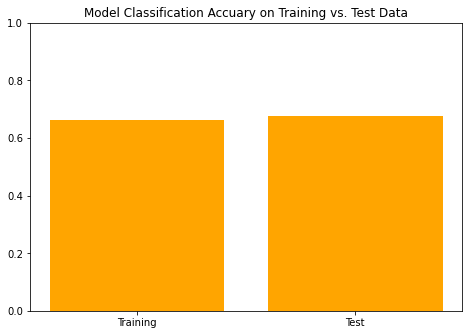

In [69]:


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [61]:
#Create a Gaussian Classifier
NBmodel = GaussianNB()



# Prepare input and output for learning
X = encodedDF1.iloc[:,0:2]
y = encodedDF1.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.4, stratify=y)

# show the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag
1927     1             1
547      1             0
1742     1             1
360      0             1
424      0             1
...    ...           ...
2454     1             0
2259     1             1
2855     1             0
325      0             1
512      1             1

[2007 rows x 2 columns]
      Type  Alcohol_flag
3340     1             0
89       0             1
904      1             0
2360     1             1
301      0             1
...    ...           ...
2839     1             0
1333     0             0
594      1             1
2814     1             0
2321     1             1

[1338 rows x 2 columns]


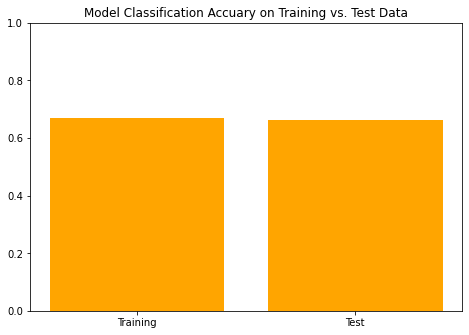

In [62]:
# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [63]:
#Create a Gaussian Classifier
NBmodel = GaussianNB()
 

# Prepare input and output for learning
X = encodedDF1.iloc[:,0:2]
y = encodedDF1.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.5, stratify=y)

# show the sets
print(X_train)
print(X_test)

      Type  Alcohol_flag
25       0             1
2489     1             0
583      1             0
1396     0             0
2032     1             1
...    ...           ...
2499     1             0
238      0             0
2855     1             0
2795     1             0
908      1             0

[1672 rows x 2 columns]
      Type  Alcohol_flag
1881     1             1
1957     1             1
1589     1             1
3038     1             0
386      0             0
...    ...           ...
2985     1             0
2615     1             0
42       0             1
2580     1             0
2914     1             0

[1673 rows x 2 columns]


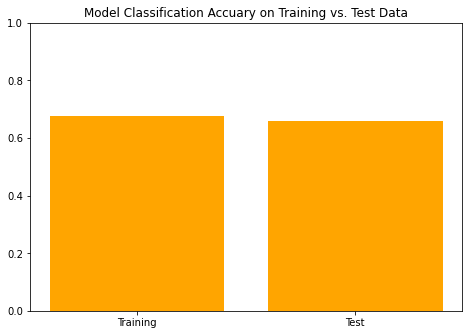

In [64]:
# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [70]:
# summary 

# since the change of the training, the test part will be influenced

# however, even though the difference of training size is big,

# the result difference will still be small